In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [286]:
dt = 0.01
# kp = 10
# ki = 0
# kd = 0.5
kp = 10
ki = 0
kd = 1

def calculate_pid(current, target, pid_i, prev_error):
    error = target - current
    pid_p = kp * error
    delta_error = error - prev_error
    if abs(error) < 5:
        pid_i += ki * error * dt
    else:
        pid_i = 0
    pid_d = kd * delta_error / dt
    pid = pid_p + pid_i + pid_d

    if abs(pid) > 1000:
        pid = 200 * (pid / abs(pid))
    

    return pid, pid_i, pid_d, error

In [287]:
targets = [0, 30, -45, -60, 60, 45, 0]
# targets = [0, 30, 30, 30, 30]
current = 0
rate_of_change = 0
pid_i = 0
error = 0
target = targets[0]

data = []

for i in range(len(targets) * 100):
    if i%100 == 0:
        idx = i // 100
        idx %= len(targets)
        target = targets[idx]
    
    pid, pid_i, pid_d, error = calculate_pid(current, target, pid_i, error)
    # for inertia
    # current += _current * 0.05
    rate_of_change += pid * 0.002
    current += rate_of_change
    data.append([target, current, pid_i, pid_d, error])
data = np.array(data)

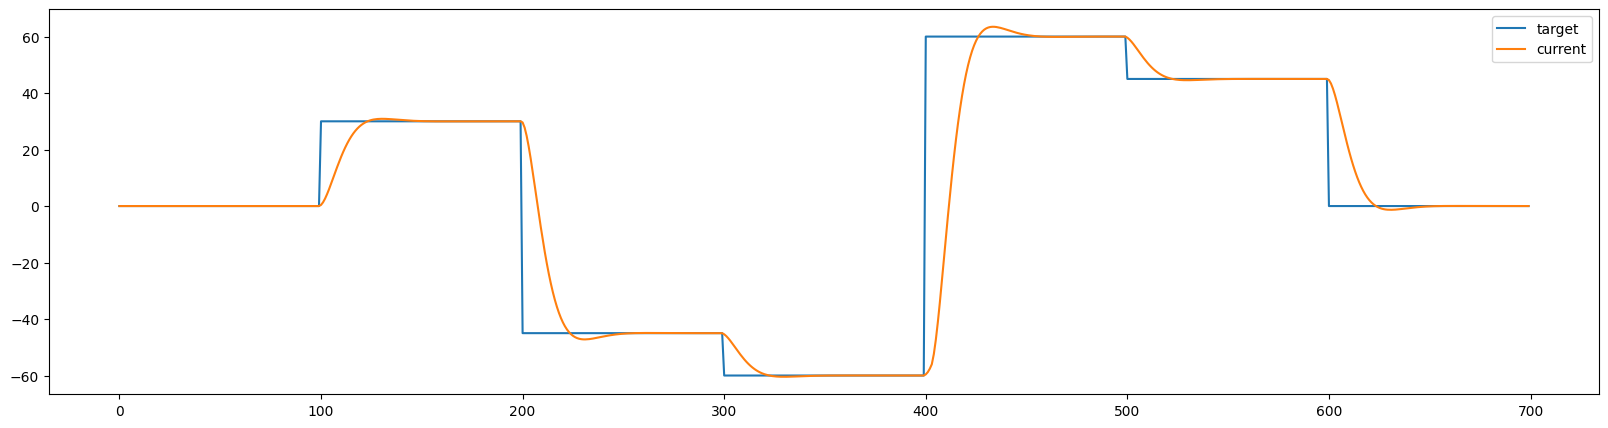

In [288]:
_data = data#[480:550]
plot_data = [
    [_data[:, 0], 'target'],
    [_data[:, 1], 'current'],
    # [_data[:, 2], 'pid_i'],
    # [_data[:, 3], 'pid_d'],
    # [_data[:, 4], 'error'],
]
plt.figure(figsize=(20, 5))
for d, _ in plot_data:
    plt.plot(d)
plt.legend([p[1] for p in plot_data])
plt.show()